In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image=cv.imread("sampleImg.jpg",1) #reads in BGR
#here 1=colored img 0=B&W img
image=cv.cvtColor(image, cv.COLOR_BGR2RGB)
#we hv to cnvrt from BGR to RGB bfr using plt.imshow

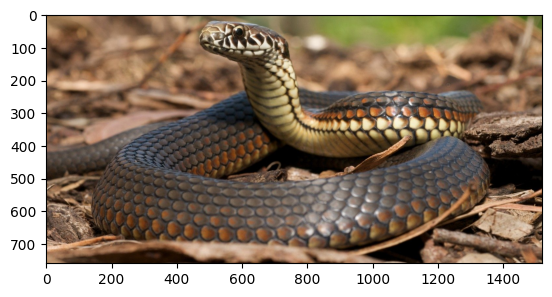

In [3]:
plt.imshow(image)
plt.show()

In [4]:
#OpenCV reads the image data in a NumPy array so we can find the dim&channels by shape()
#here tuple is not callable so dont use ()
dim=image.shape 
height,width,channels=dim

In [5]:
print(f"Dimensions: {dim}")
print(f"Height: {height}")
print(f"Width: {width}")
print(f"Number of Channels: {channels}")  # Red Green Blue (RGB) channels.  

Dimensions: (760, 1519, 3)
Height: 760
Width: 1519
Number of Channels: 3


In [6]:
image.size  #Each element in the ndarray represents one image pixel.

3463320

We can access and manipulate any pixel’s value, with the help of the command mentioned 
below. 
let's change the color value of the first 200X200 pixels to black.

In [7]:
for i in range(200):
    for j in range(200):
        image[i][j]=[0,0,0]

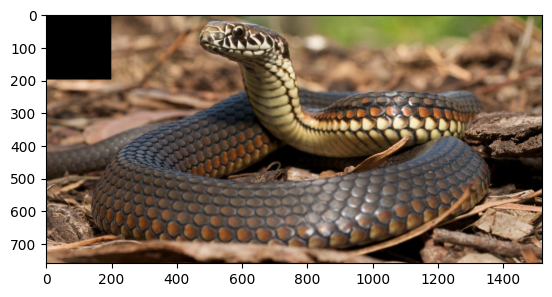

In [8]:
plt.imshow(image)

The split() function returns a multi-channel array. 
You can now perform manipulation on each plane.
Suppose we set all pixels in blue channel to 0

In [9]:
b,g,r=cv.split(image)

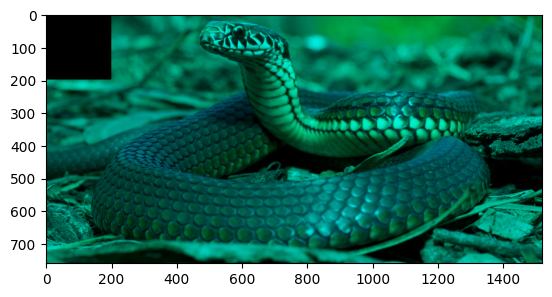

In [10]:
image[:, :, 0]=0   #all rows,all columns and only blue channel(0)
plt.imshow(image) 
plt.show()

we can draw shapes and line on the given image as follows
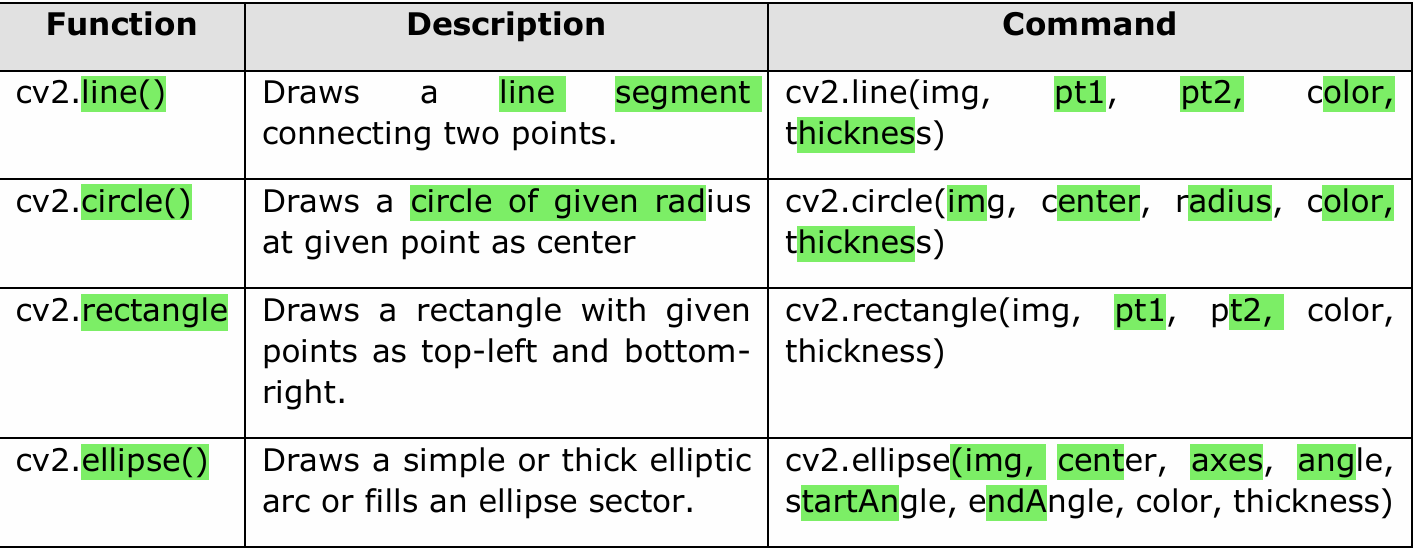

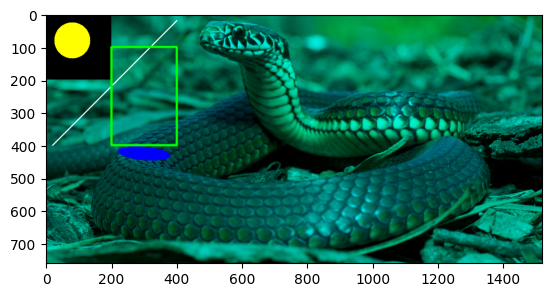

In [11]:
cv.line(image,(20,400),(400,20),(255,255,255),3) 
cv.rectangle(image,(200,100),(400,400),(0,255,0),5) 
cv.circle(image,(80,80), 55, (255,255,0), -1)   
cv.ellipse(image, (300,425), (80, 20), 5, 0, 360, (0,0,255), -1)
plt.imshow(image)
plt.show()

similarly we can add text by using putText()
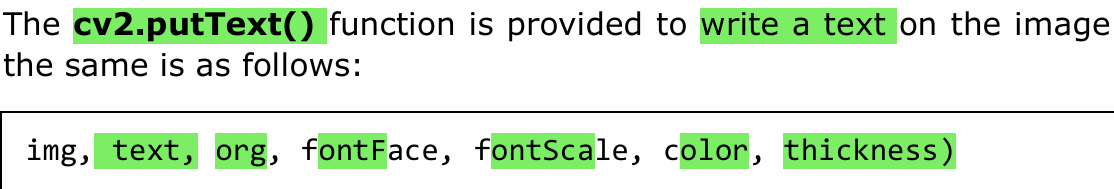

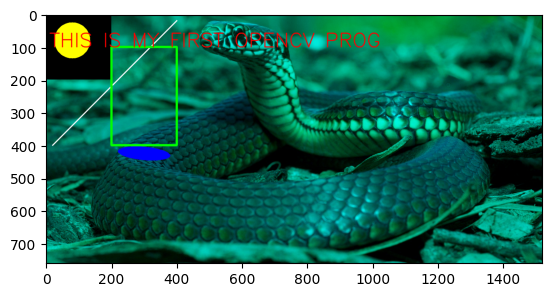

In [12]:
txt="THIS IS MY FIRST OPENCV PROG" 
font = cv.FONT_HERSHEY_SIMPLEX 
cv.putText(image,txt,(10,100), font, 2,(255,0,0),2,cv.LINE_AA) 
plt.imshow(image)

.






In [13]:
img=cv.imread("cricketSample.jpg")

In [14]:
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

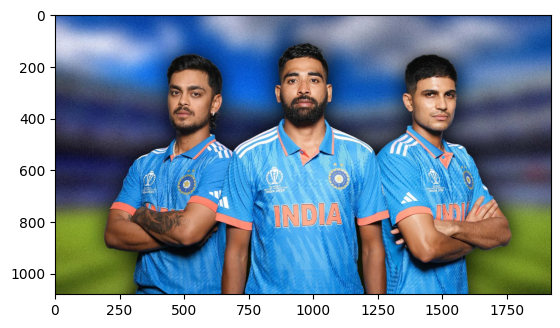

In [15]:
plt.imshow(img)
plt.show()

In [16]:
h,w=img.shape[:2]
h,w

(1080, 1920)

In [17]:
img.size

6220800

TO RESIZE AN IMAGE
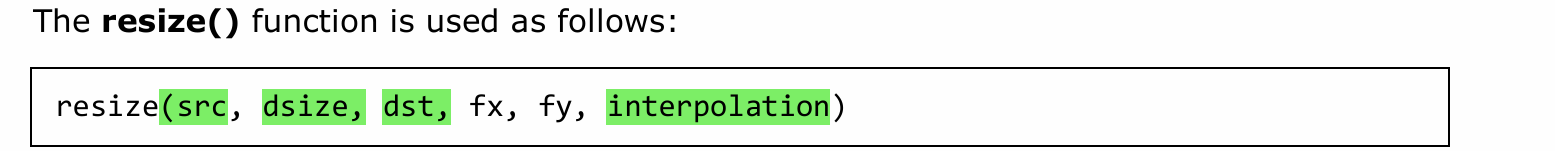

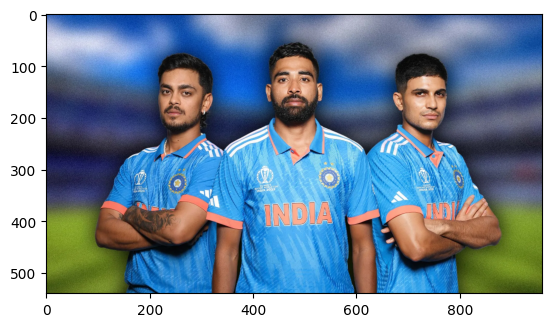

In [18]:
res=cv.resize(img,(int(w/2), int(h/2)), interpolation = cv.INTER_AREA)
plt.imshow(res)

TO ROTATE AN IMAGE..........The cv2 module provides two functions cv2.warpAffine and cv2.warpPerspective, with which you can have all kinds of transformations. cv2.warpAffine takes a 2x3 
transformation matrix while cv2.warpPerspective takes a 3x3 transformation matrix as 
input.  
To find this transformation matrix for rotation, OpenCV provides a function, 
cv2.getRotationMatrix2D, which is as follows: 
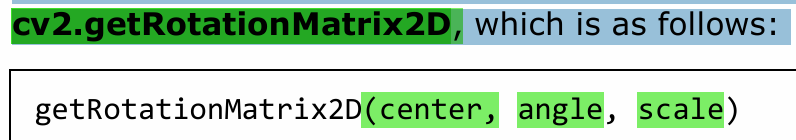

In [19]:
H,W=res.shape[:2]
center = (W / 2, H / 2) 

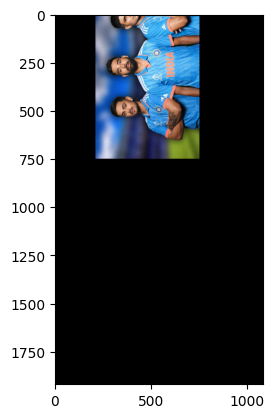

In [20]:
mat = cv.getRotationMatrix2D(center, 90, 1)   
rotimg = cv.warpAffine(res, mat, (h, w))   
plt.imshow(rotimg)

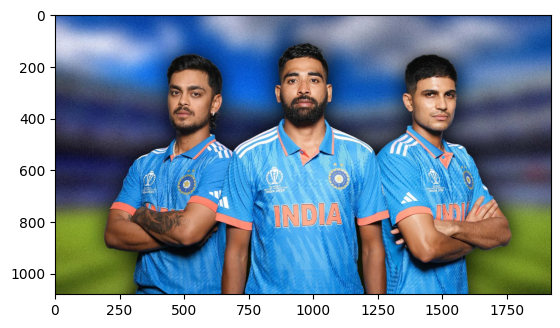

In [21]:
#lets work with original image again
plt.imshow(img)
plt.show()

Image Threshold :In digital image processing, the thresholding is a process of creating a binary image based on a threshold value of pixel intensity. Thresholding process separates the foreground 
pixels from background pixels. (REFER TO THE BOOK)
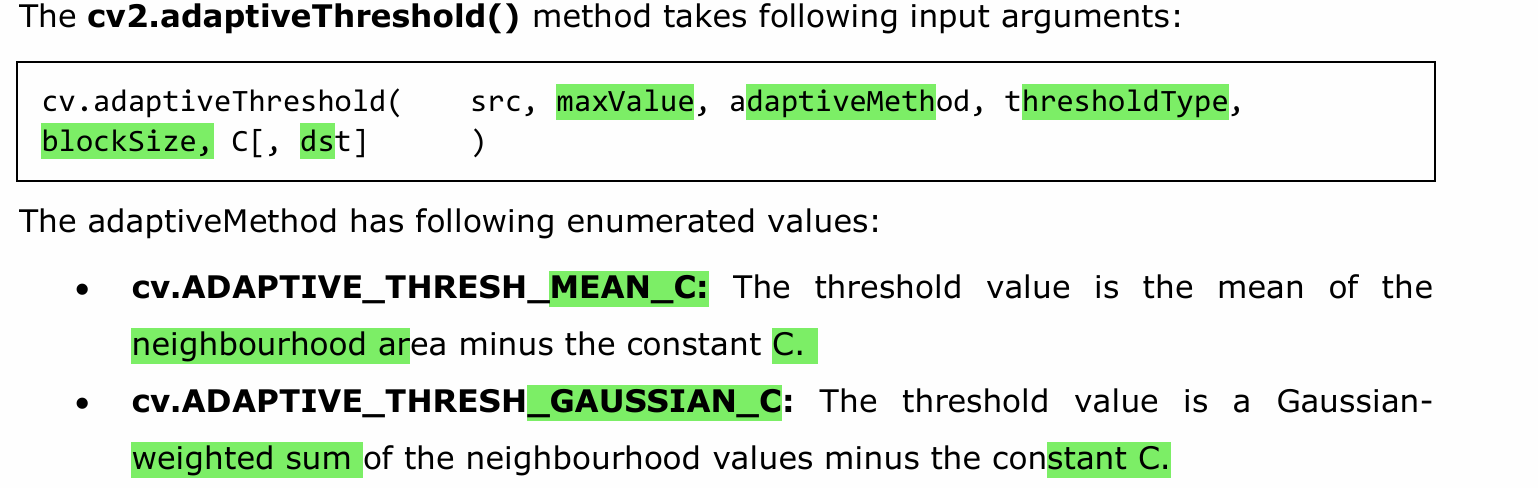

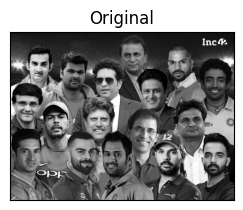

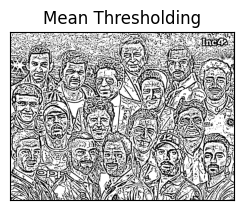

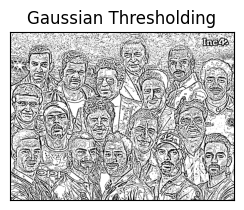

In [22]:
#firstly convert to grayscale image BEFORE APPLYING THRESHOLDING
img2=cv.imread("img2.png")
img2=cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img2 =cv.cvtColor(img2,cv.COLOR_RGB2GRAY)
img3 = cv.medianBlur(img2,5) 
th1 = cv.adaptiveThreshold(img3,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2) 
th2 = cv.adaptiveThreshold(img3,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2) 
titles = ['Original', 'Mean Thresholding', 'Gaussian Thresholding'] 
images = [img3, th1, th2] 
for i in range(3): 
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray') 
    plt.title(titles[i]) 
    plt.xticks([]),plt.yticks([]) 
    plt.show()

IMAGE FILTERING:Image filtering is a process of averaging the pixel values so as to alter the shade, 
brightness, contrast etc. of the original image. 

By applying a low pass filter, we can remove any noise in the image. High pass filters help 
in detecting the edges. 
The OpenCV library provides cv2.filter2D() function. It performs convolution of the 
original image by a kernel of a square matrix of size 3X3 or 5X5 etc. 

Convolution slides a kernel matrix across the image matrix horizontally and vertically. For 
each placement, add all pixels under the kernel, take the average of pixels under the 
kernel and replace the central pixel with the average value
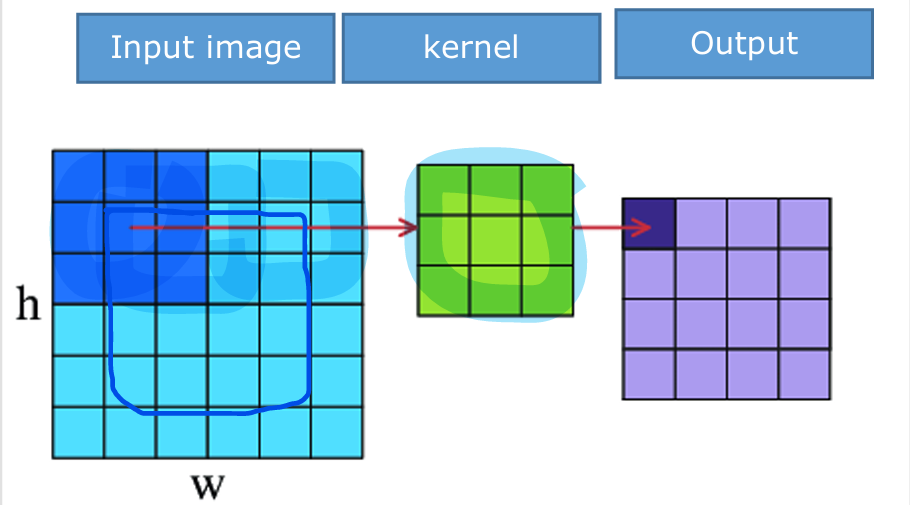

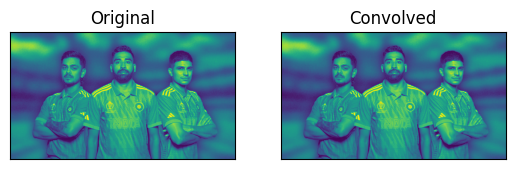

In [23]:
img4=cv.imread("cricketSample.jpg")
img4=cv.cvtColor(img4, cv.COLOR_BGR2RGB)
img4 =cv.cvtColor(img4,cv.COLOR_RGB2GRAY)
kernel = np.ones((3,3),np.float32)/9 
dst = cv.filter2D(img4,-1,kernel) 
plt.subplot(121),plt.imshow(img4),plt.title('Original') 
plt.xticks([]), plt.yticks([]) 
plt.subplot(122),plt.imshow(dst),plt.title('Convolved') 
plt.xticks([]), plt.yticks([])
'''xticks([]) and yticks([]) in matplotlib are used to control the appearance
of the x-axis and y-axis ticks in a plot. When you pass an empty list []
to these functions, it effectively hides the ticks on the respective axis.'''

plt.show()

Edge Detection :We have  cv2.Canny() function that identifies the edges of various objects


In [24]:
edges = cv.Canny(img4,100,200) 

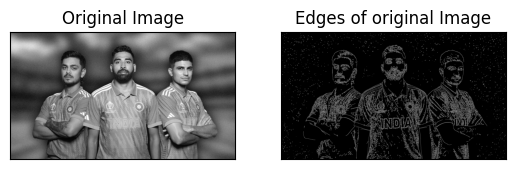

In [25]:
plt.subplot(121),plt.imshow(img4,cmap = 'gray') 
plt.title('Original Image'), plt.xticks([]), plt.yticks([]) 
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edges of original Image'), plt.xticks([]), plt.yticks([]) 
plt.show()